In [72]:
'''import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

pi = np.pi

from scipy.special import expit as sigmoid

def raised_cosine_filter(beta0, T0, num_points=1000, s=1):
    lin = np.linspace(-T0, T0, num_points)
    A = np.ones(lin.shape[0]) * ((1 - beta0) / (2 * T0))
    B = np.ones(lin.shape[0]) * ((1 + beta0) / (2 * T0))
    ABS = np.abs(lin)

    return lin, 1 * sigmoid(s * (A - ABS)) + 0.5 * \
            (1 + np.cos(np.pi * T0 * (ABS - ((1 - beta0) / (2 * T0))) / beta0) * (sigmoid(s * (B - ABS)) - sigmoid(s * (A - ABS))))'''

'import torch\nfrom torch import nn\nfrom matplotlib import pyplot as plt\nimport numpy as np\n\npi = np.pi\n\nfrom scipy.special import expit as sigmoid\n\ndef raised_cosine_filter(beta0, T0, num_points=1000, s=1):\n    lin = np.linspace(-T0, T0, num_points)\n    A = np.ones(lin.shape[0]) * ((1 - beta0) / (2 * T0))\n    B = np.ones(lin.shape[0]) * ((1 + beta0) / (2 * T0))\n    ABS = np.abs(lin)\n\n    return lin, 1 * sigmoid(s * (A - ABS)) + 0.5 *             (1 + np.cos(np.pi * T0 * (ABS - ((1 - beta0) / (2 * T0))) / beta0) * (sigmoid(s * (B - ABS)) - sigmoid(s * (A - ABS))))'

In [2]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

pi = np.pi

def sigmoid(x): return 1 / (1 + np.exp(-x))

def raised_cosine_filter(beta0, T0, num_points=1000, s=1):
    lin = np.linspace(-5, 5, num_points)
    abs_lin = np.abs(lin)  # Renamed to avoid shadowing 'abs' function

    f1 = (1 - beta0) / (2 * T0)
    f2 = (1 + beta0) / (2 * T0)
    
    f_ = T0 / 2 * (1 + np.cos(np.pi * T0 / beta0 * (abs_lin - f1)))  
    
    out = T0 * (sigmoid(s*(abs_lin)) - sigmoid(s*(abs_lin - f1))) \
     + f_ * (sigmoid(s*(abs_lin - f1)) - sigmoid(s*(abs_lin - f2)))
        
    return lin, out


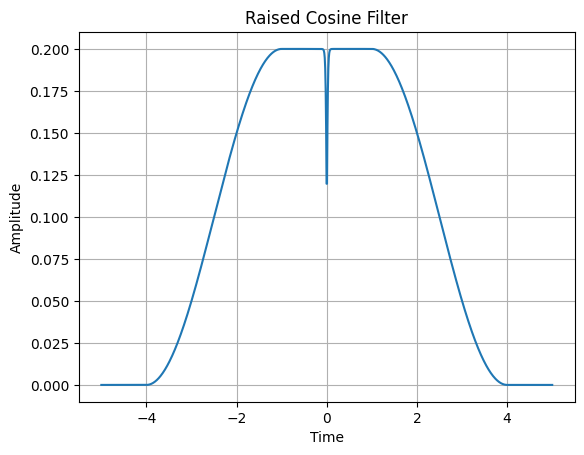

In [9]:
# Parameters
s = 80
beta = 0.6 # Roll-off factor
T = 0.2 # Symbol period

# Generate filter valuest\
t, rc_filter = raised_cosine_filter(beta, T, s=s)

# Plot the filter
plt.plot(t, rc_filter)
plt.title('Raised Cosine Filter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

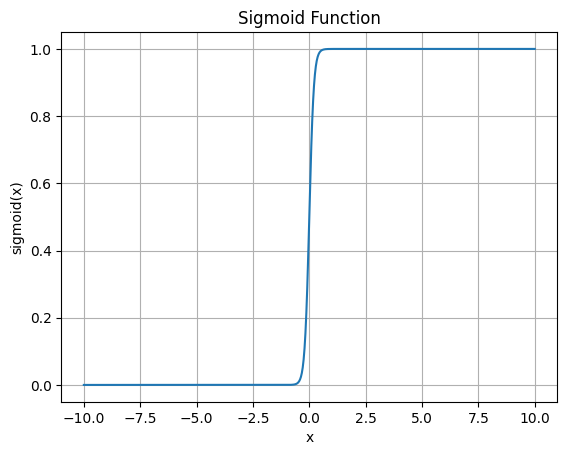

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values (input range)
x = np.linspace(-10, 10, 1000)

# Apply the sigmoid function to each x value
y = sigmoid(10*x)

# Plot the sigmoid function
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()
